<a href="https://colab.research.google.com/github/Sjleerodls/Data_Analysis/blob/main/lab_da/da05_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필요한 모듈 import

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 데이터셋 준비

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Box Plot

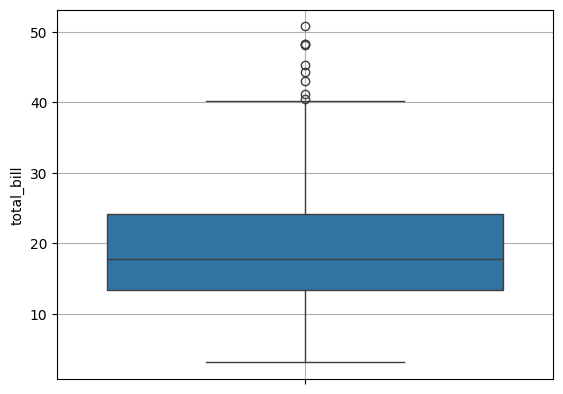

In [5]:
sns.boxplot(data=tips, y='total_bill')

plt.grid()
plt.show()

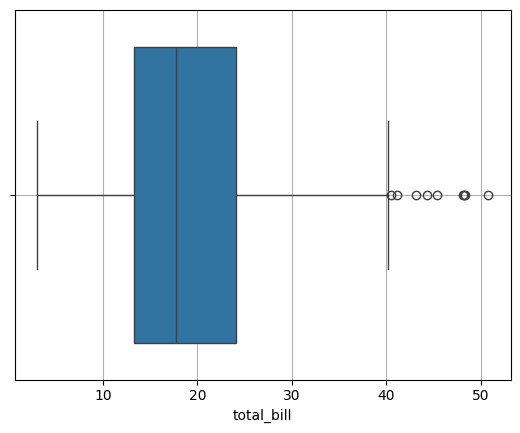

In [6]:
sns.boxplot(data=tips, x='total_bill')
plt.grid()
plt.show()

## 성별 팁의 box plot

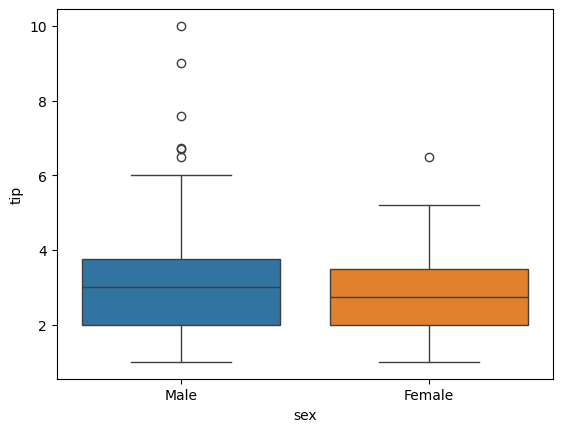

In [47]:
sns.boxplot(data=tips, x = 'sex', y='tip', hue='sex')
plt.show()

In [8]:
tips[tips.sex == 'Male'].tip.describe()

,tip
count,157.000000
mean,3.089618
std,1.489102
min,1.000000
25%,2.000000
50%,3.000000
75%,3.760000
max,10.000000


In [9]:
tips[tips.sex == 'Female'].tip.describe()

,tip
count,87.000000
mean,2.833448
std,1.159495
min,1.000000
25%,2.000000
50%,2.750000
75%,3.500000
max,6.500000


## 흡연 여부별 팁의 박스 boxplot

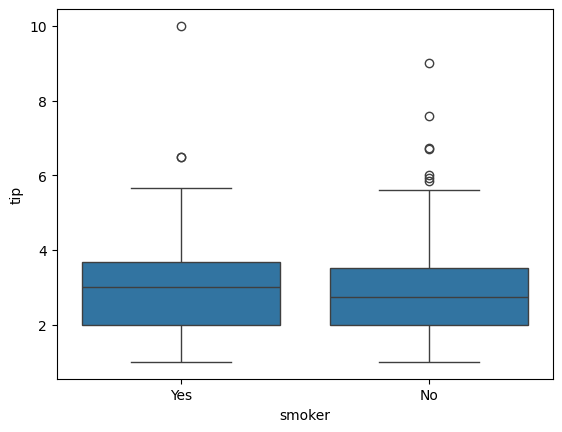

In [10]:
sns.boxplot(data=tips, x='smoker', y='tip')

plt.show()

## 요일별 팁의 box plot

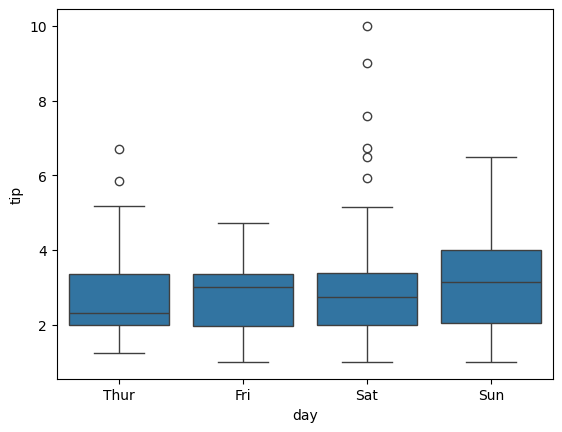

In [11]:
sns.boxplot(data=tips, x='day', y='tip')

plt.show()

## 시간별 팁의 box plot

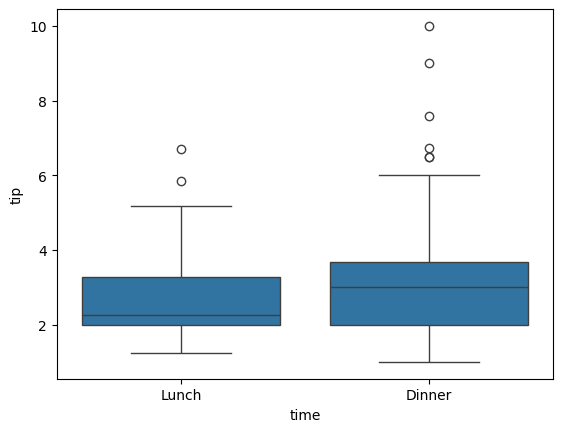

In [12]:
sns.boxplot(data=tips, x='time', y='tip')

plt.show()

## 요일별, 성별 팁의 box plot

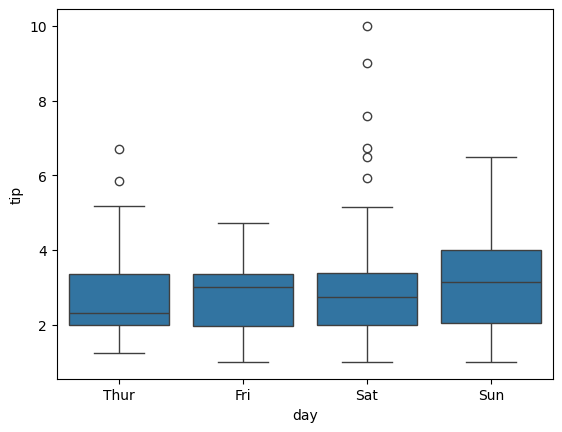

In [13]:
sns.boxplot(data=tips, x='day', y='tip')

plt.show()

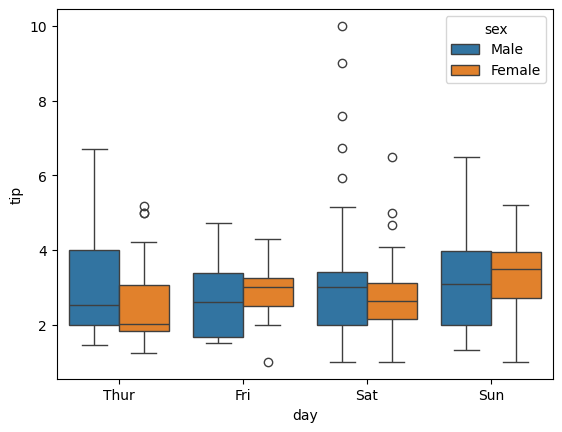

In [14]:
sns.boxplot(data=tips, x='day', y='tip', hue='sex')

plt.show()

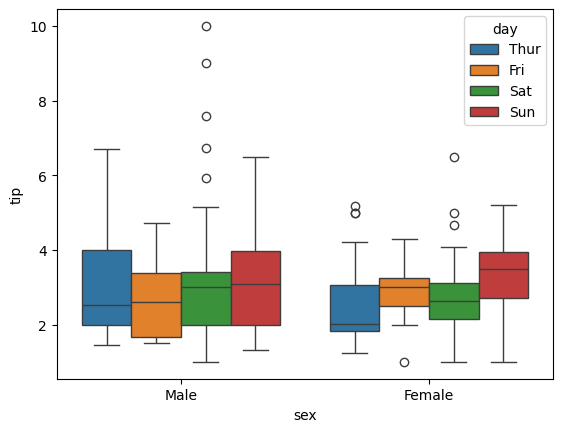

In [15]:
sns.boxplot(data=tips, x='sex', y='tip', hue='day')

plt.show()

## 2개 이상의 Axes 사용하기

Figure에 Axes(nrows=1, ncols=2) 2개를 생성하고, 성별 tip의 box plot과 시간별 tip의 box plot을 그리세요.

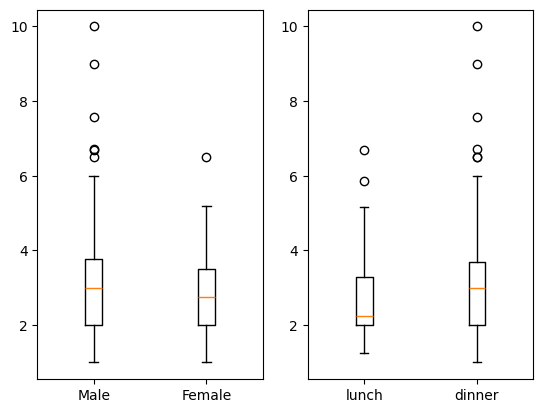

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=2)

male = tips[tips.sex == 'Male'].tip
female = tips[tips.sex == 'Female'].tip
lunch = tips[tips.time == 'Lunch'].tip
dinner = tips[tips.time == 'Dinner'].tip

ax[0].boxplot(x=[male, female], tick_labels=['Male', 'Female'])
ax[1].boxplot(x=[lunch, dinner], tick_labels=['lunch', 'dinner'])

plt.show()

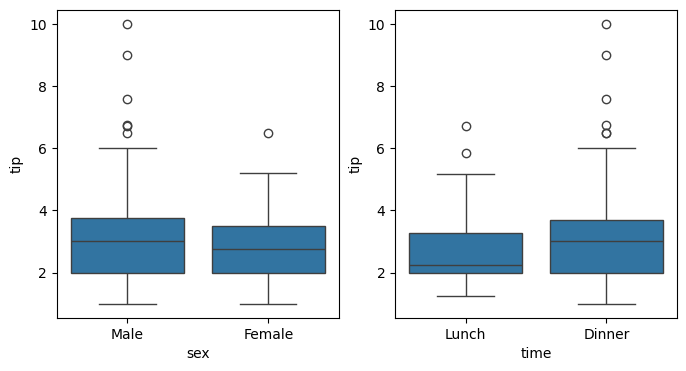

In [17]:
fig, axes = plt.subplots(ncols=2, figsize=(8,4))

sns.boxplot(data=tips, x='sex', y='tip', ax=axes[0])        # ax= 를 사용해 index 설정
sns.boxplot(data=tips, x='time', y='tip', ax=axes[1])

plt.show()

## Histogram(히스토그램)

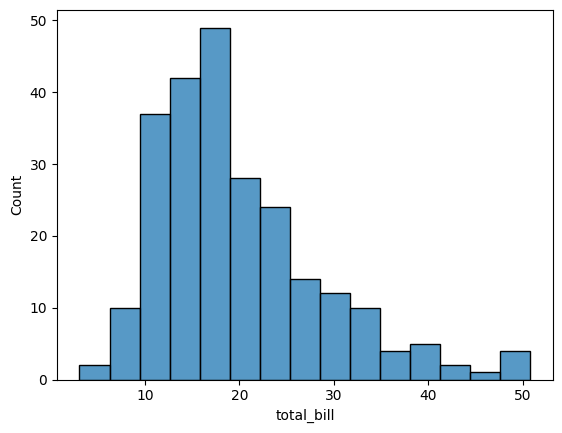

In [18]:
sns.histplot(data=tips, x='total_bill', bins=15)    # 막대의 개수 조정 bins

plt.show()

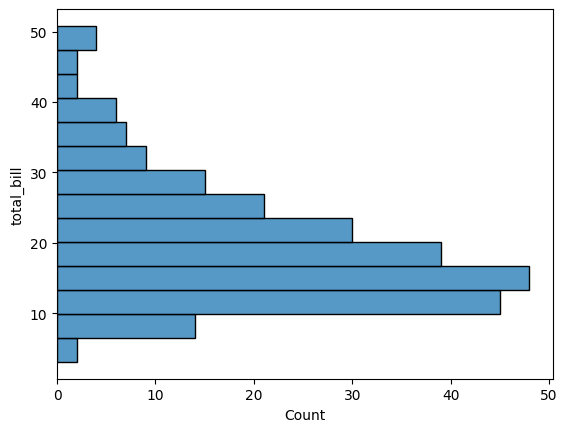

In [19]:
sns.histplot(data=tips, y='total_bill')
plt.show()

Figure, Axes(nrows=2, ncols=1) 2개를 생성, 위쪽에는 tip의 box plot, 아래쪽에는 tip의 histogram을 그리세요.

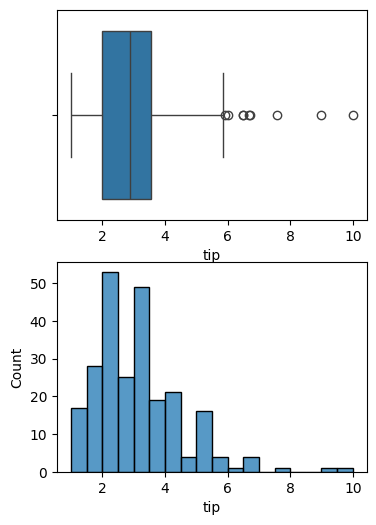

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(4,6))

sns.boxplot(data=tips, x='tip', ax=axes[0])
sns.histplot(data=tips, x='tip', ax=axes[1])

plt.show()

# 막대 그래프

## countplot()

카테고리(범주) 타입 변수의 빈도수를 막대로 시각화.

In [21]:
tips.sex.value_counts()

,count
sex,
Male,157
Female,87


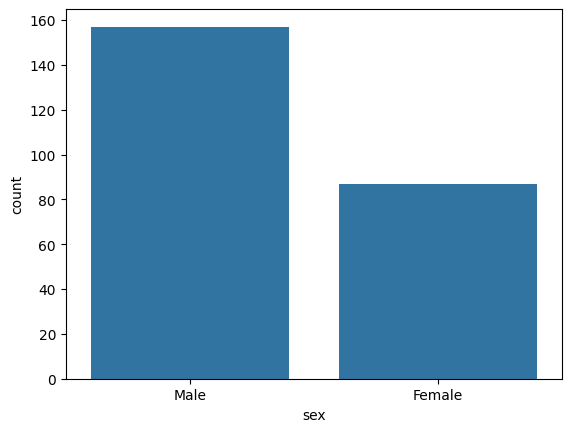

In [22]:
sns.countplot(data=tips, x='sex')

plt.show()

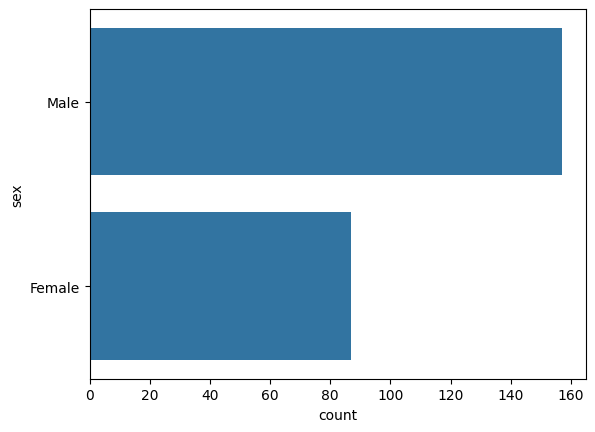

In [23]:
sns.countplot(data=tips, y='sex')

plt.show()

요일별 빈도수 막대 그래프

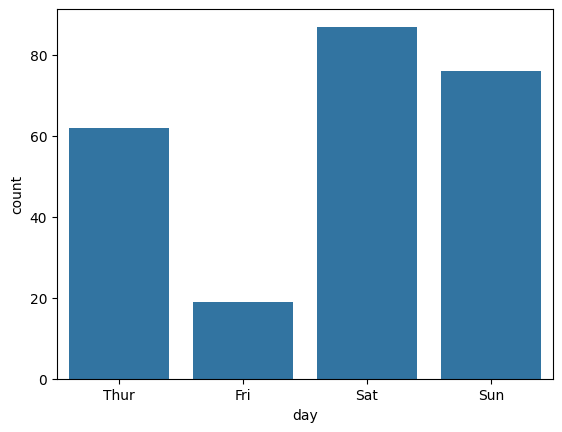

In [24]:
sns.countplot(data=tips, x='day')  # order=tips.day.value_counts().index

plt.show()

In [25]:
tips.day.value_counts() # count 별 내림차순 정렬

,count
day,
Sat,87
Sun,76
Thur,62
Fri,19


Rectangle(xy=(-0.4, 0), width=0.8, height=62, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=19, angle=0)
Rectangle(xy=(1.6, 0), width=0.8, height=87, angle=0)
Rectangle(xy=(2.6, 0), width=0.8, height=76, angle=0)


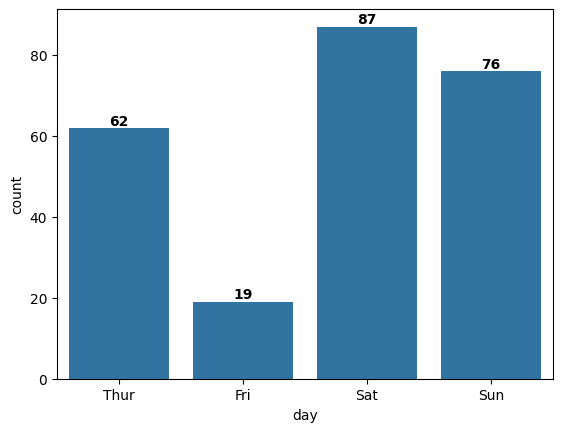

In [26]:
fig, ax = plt.subplots()
sns.countplot(data=tips, x='day')
for p in ax.patches:
    print(p)
    ax.text(x=p.get_x() + p.get_width() / 2,        # 텍스트를 그릴 x 좌표
            y=p.get_y() + p.get_height() + 0.8,     # 텍스트를 그릴 y 좌표
            s=f'{p.get_height():.0f}',              # 표시할 텍스트 내용
            ha='center',                            # horizontal align(수평(좌우)정렬)
            fontweight='bold')                      # font weight : light, regular, bold, ...

plt.show()

요일별 성별 빈도수 막대 그래프

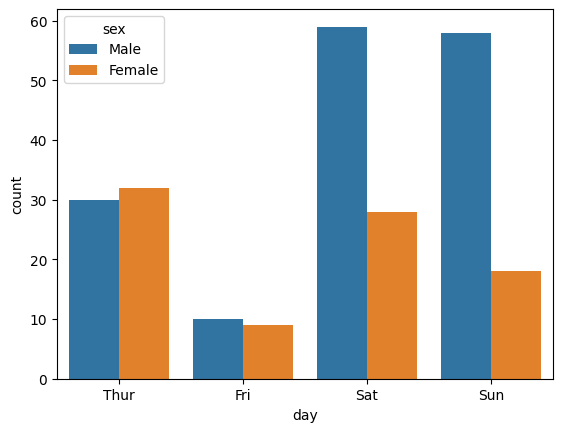

In [27]:
sns.countplot(data=tips, x='day', hue='sex')

plt.show()

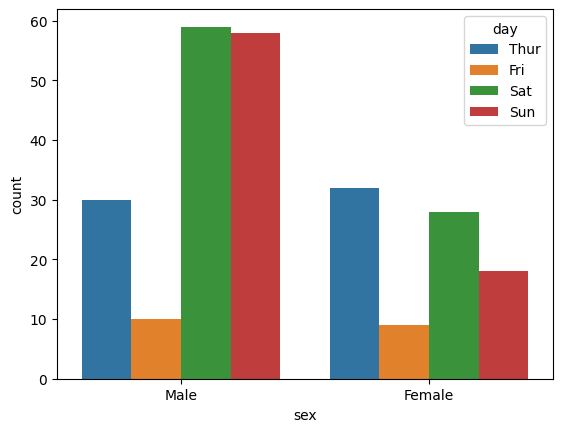

In [28]:
sns.countplot(data=tips, x='sex', hue='day')    # day는 카테고리의 내용인 목,금,토,일 순서로 정렬됨.

plt.show()

In [29]:
days = tips.day.cat.categories
for d in days:
    print(f'--- {d} ---')
    subset_df = tips[tips.day == d]
    print(subset_df.sex.value_counts())

--- Thur ---
sex
Female    32
Male      30
Name: count, dtype: int64
--- Fri ---
sex
Male      10
Female     9
Name: count, dtype: int64
--- Sat ---
sex
Male      59
Female    28
Name: count, dtype: int64
--- Sun ---
sex
Male      58
Female    18
Name: count, dtype: int64


In [30]:
# data_frame.groupby([cat1, cat2, ...]).colum_name.stat_func()
tips.groupby(by=['day', 'sex']).sex.count()     # df내 groupby 메서드 사용.

/tmp/ipython-input-30-2551925673.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(by=['day', 'sex']).sex.count()


day   sex   
Thur  Male      30
      Female    32
Fri   Male      10
      Female     9
Sat   Male      59
      Female    28
Sun   Male      58
      Female    18
Name: sex, dtype: int64

In [31]:
tips.groupby(by=['sex', 'day']).sex.count()

/tmp/ipython-input-31-4017018135.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(by=['sex', 'day']).sex.count()


sex     day 
Male    Thur    30
        Fri     10
        Sat     59
        Sun     58
Female  Thur    32
        Fri      9
        Sat     28
        Sun     18
Name: sex, dtype: int64

성별 흡연여부별 빈도수 막대 그래프

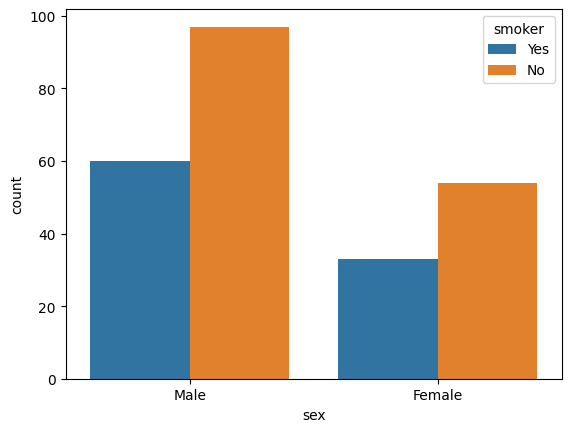

In [32]:
sns.countplot(data=tips, x='sex', hue='smoker')

plt.show()

In [33]:
tips.groupby(by=['sex', 'smoker']).sex.count()

/tmp/ipython-input-33-4123852135.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(by=['sex', 'smoker']).sex.count()


sex     smoker
Male    Yes       60
        No        97
Female  Yes       33
        No        54
Name: sex, dtype: int64

## `barplot()`

* 그룹별 변수(숫자 타입)의 기술 통계량(예: 평균, 최댓값, ...)을 막대로 시각화.
* 카테고리(범주) 타입 변수와 연속형 변수를 함께 시각화.

성별 팁의 평균

In [49]:
tips.groupby(by=['sex'], observed=False).tip.mean()

,tip
sex,
Male,3.089618
Female,2.833448


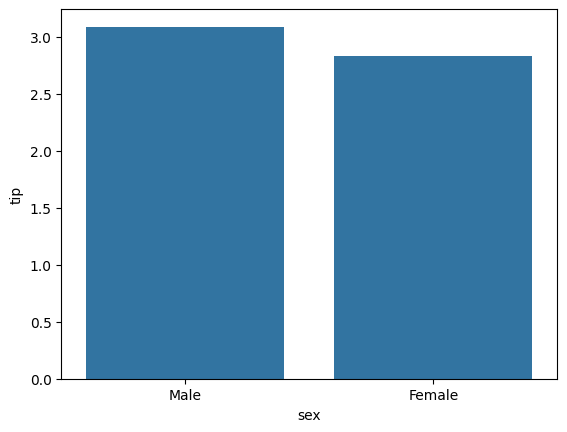

In [35]:
sns.barplot(data=tips, x='sex', y='tip', errorbar=None)
# estimator = 'mean'이 기본값이기 때문에 막대의 높이(height)는 평균값이 출력됨.
plt.show()

성별 팁의 중위값(50%)

In [48]:
tips.groupby(by=['sex'], observed=False).tip.median()

,tip
sex,
Male,3.00
Female,2.75


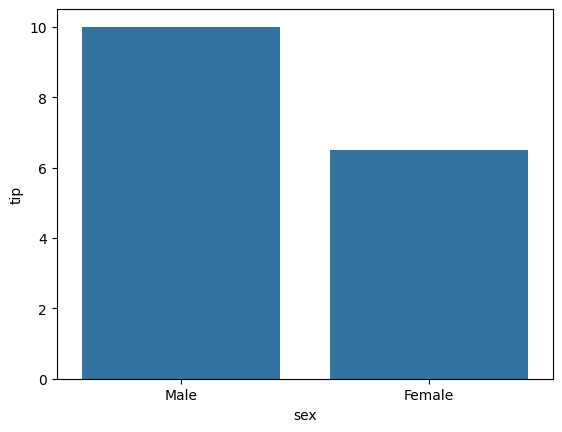

In [37]:
sns.barplot(data=tips, x='sex', y='tip', estimator='max', errorbar=None)

plt.show()

요일별 팁의 평균 가로 막대 그래프

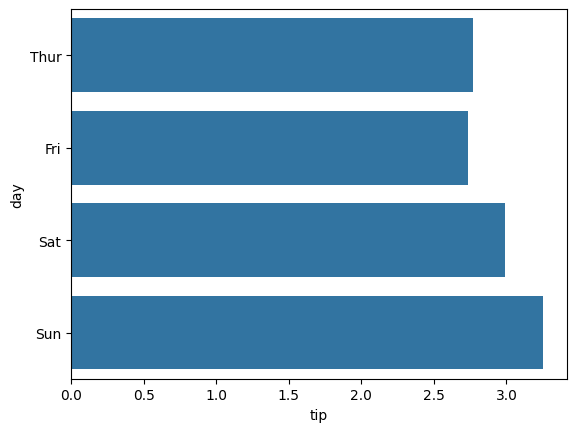

In [38]:
sns.barplot(data=tips, y='day', x='tip', errorbar=None)
plt.show()

In [39]:
tips.groupby(by=['day']).tip.mean()

/tmp/ipython-input-39-1238870240.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(by=['day']).tip.mean()


,tip
day,
Thur,2.771452
Fri,2.734737
Sat,2.993103
Sun,3.255132


요일별 성별 팁의 평균 세로 막대 그래프

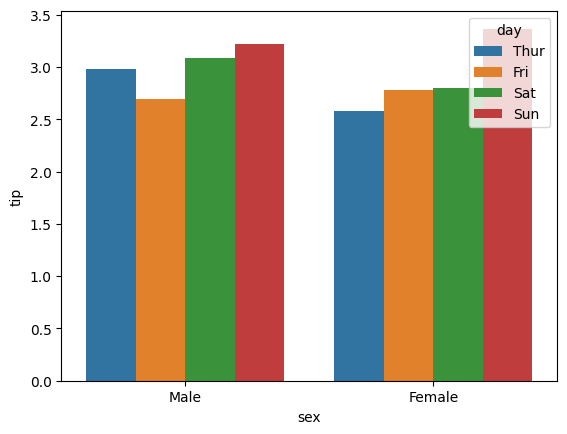

In [52]:
sns.barplot(data=tips, x='sex', y='tip', hue='day', errorbar=None, estimator='mean')
plt.show()

In [41]:
tips.groupby(by=['day', 'sex']).tip.mean()

/tmp/ipython-input-41-3275852311.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(by=['day', 'sex']).tip.mean()


day   sex   
Thur  Male      2.980333
      Female    2.575625
Fri   Male      2.693000
      Female    2.781111
Sat   Male      3.083898
      Female    2.801786
Sun   Male      3.220345
      Female    3.367222
Name: tip, dtype: float64

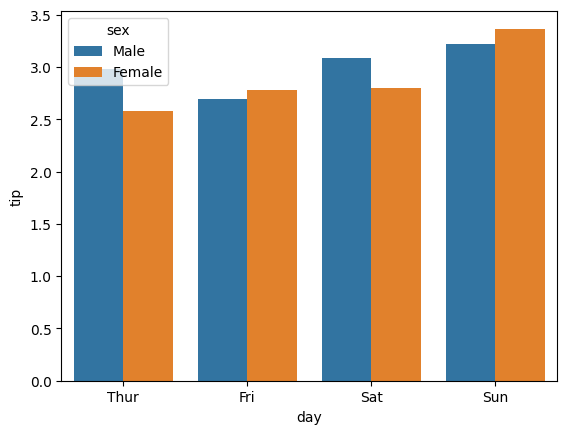

In [42]:
sns.barplot(data=tips, x='day', y='tip', hue='sex', errorbar=None)
plt.show()

In [43]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


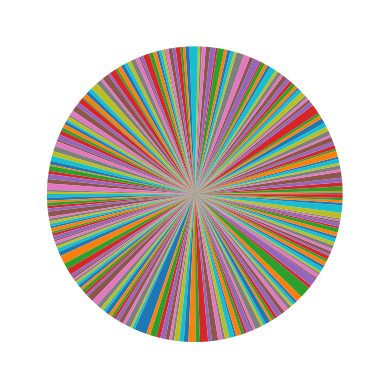

In [44]:
# plt.pie() 구현해보기.
plt.pie(x=tips.tip)
plt.show()

# Scatter plot(산점도)

## `scatterplot()`

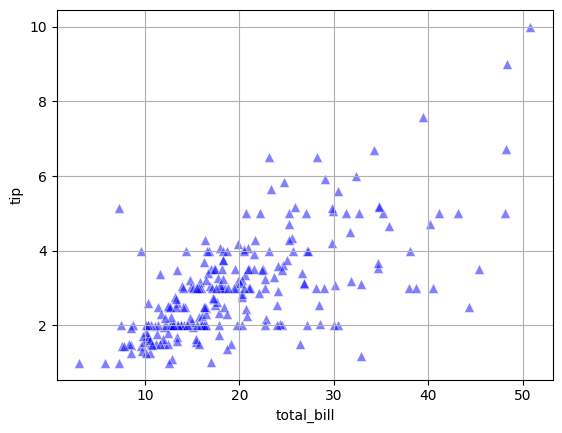

In [72]:
# tip ~ total_bill 산점도
sns.scatterplot(data=tips, x='total_bill', y='tip', s=50, marker='^', c='blue', alpha=0.5)
# sns.scatterplot() 함수의 **kwargs는 plt.scatter() 함수의 파라미터 이름들을 사용함.
# s=마커의 크기, maker=마커의 종류, c=마커 색깔, alpha=투명도
plt.grid()
plt.show()

## `regplot()`

regression plot : 산점도 + 선형 회귀(linear regression) 직선

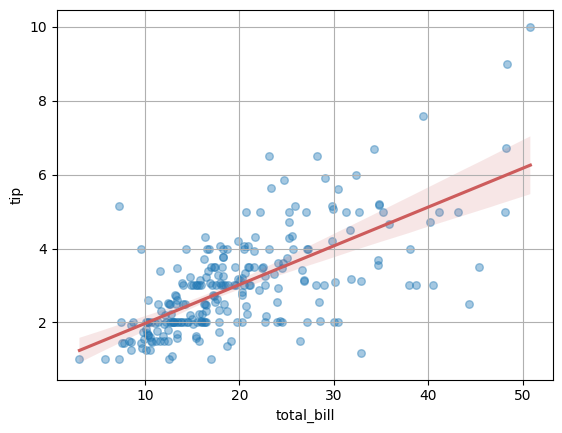

In [84]:
sns.regplot(data=tips, x='total_bill', y='tip',
            scatter_kws={'alpha':0.4, 's':30},
            line_kws={'color' : 'IndianRed'})
# sns.regplot() 함수의 scatter_kws 파라미터는 plt.scatter() 함수의 파라미터(아규먼트)들을 dict로 전달.
# sns.regplot() 함수의 line_kws 파라미터는 plt.plot() 함수의 파라미터(아규먼트)들을 dict로 전달.
plt.grid()
plt.show()

## `jointplot()`

산점도 + 히스토그램

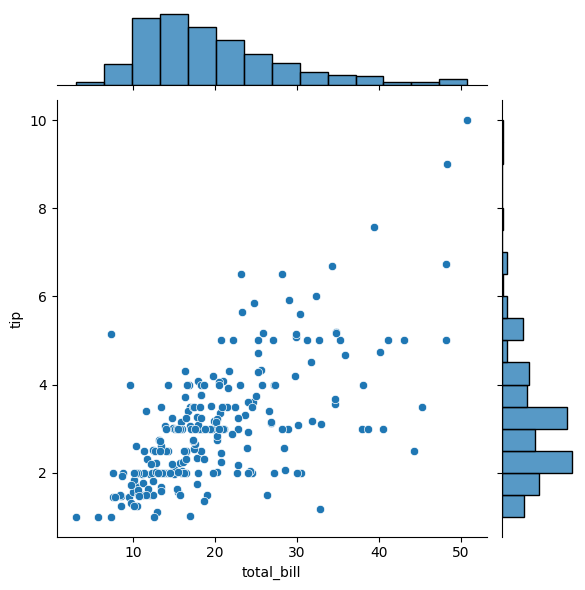

In [85]:
sns.jointplot(data=tips, x='total_bill', y='tip')
plt.show()

## Ex 1.
tip ~ total_bill 산점도. 마커의 색깔을 성별에 따라서 다르게 시각화.

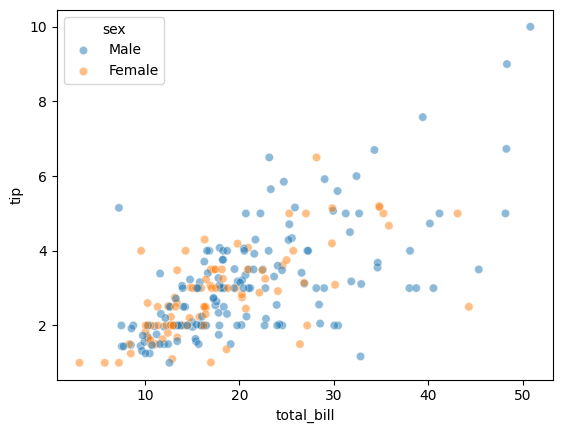

In [107]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex', alpha=0.5)
plt.show()

## Ex 2.
tip ~ total_bill 산점도. 마커의 색깔을 성별에 따라서, 마커의 크기를 size(인원수)에 따라서 다르게 시각화.

<Axes: xlabel='total_bill', ylabel='tip'>

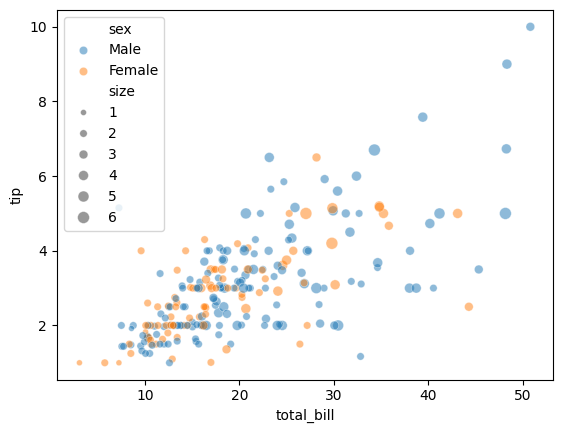

In [116]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex', size='size', alpha=0.5)

## Ex 3.
tip ~ total_bill 산점도. 마커의 색깔은 성별에 따라서, 마커의 모양을 흡연 여부에 따라서 다르게 시각화.

/tmp/ipython-input-123-568606335.py:1: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex', palette=sns.color_palette("flare"), style='smoker', alpha=1)


<Axes: xlabel='total_bill', ylabel='tip'>

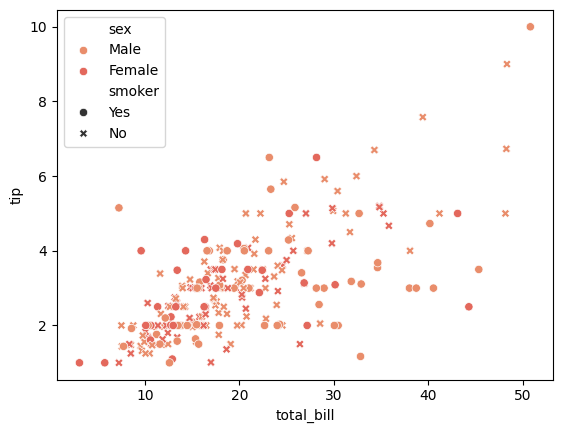

In [123]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex', palette=sns.color_palette("flare"), style='smoker', alpha=1)

<Axes: xlabel='total_bill', ylabel='tip'>

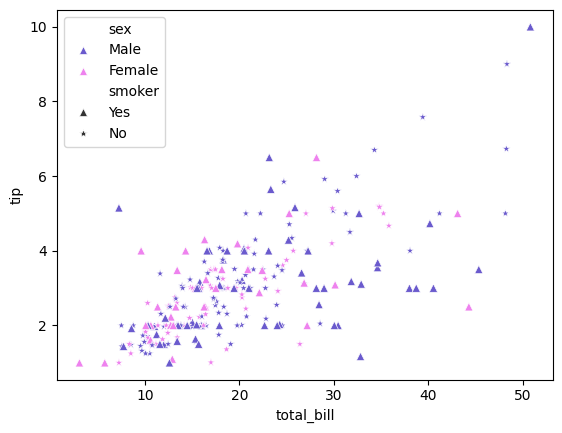

In [127]:
# 마커 색상 바꾸기.
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex', palette=['SlateBlue', 'Violet'], style='smoker', markers=['^', '*'])
# palette= 마커의 색상 원하는 색깔로 변경, style= 마커의 모양 구분 기준, makers=원하는 마커 모양으로 변경.

# Line plot(선 그래프)

In [129]:
np.random.seed(42)
df = pd.DataFrame(data={
    'day': np.arange(1, 11),
    'price' : np.random.rand(10)
})

df

,day,price
0,1,0.374540
1,2,0.950714
2,3,0.731994
3,4,0.598658
4,5,0.156019
5,6,0.155995
6,7,0.058084
7,8,0.866176
8,9,0.601115
9,10,0.708073


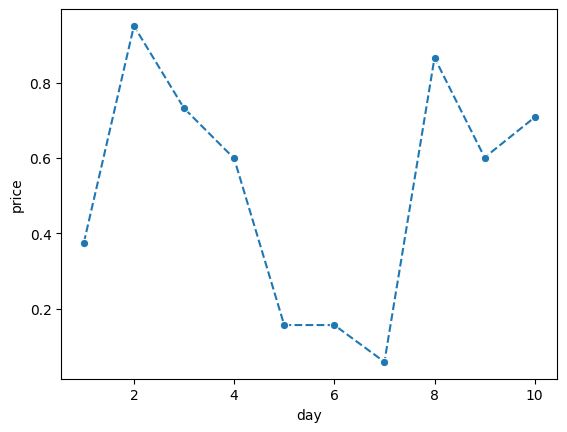

In [133]:
sns.lineplot(data=df, x='day', y='price', marker='o', linestyle='--')
# sns.lineplot() 함수의 **kwargs는 plt.plot()의 파라미터들을 사용.
plt.show()

# Category plot

카테고리(범주) 별로 Axes(서브플롯) 객체를 생성하고, 변수의 통계값을 모든 Axes에 같은 종류의 그래프로 시각화.

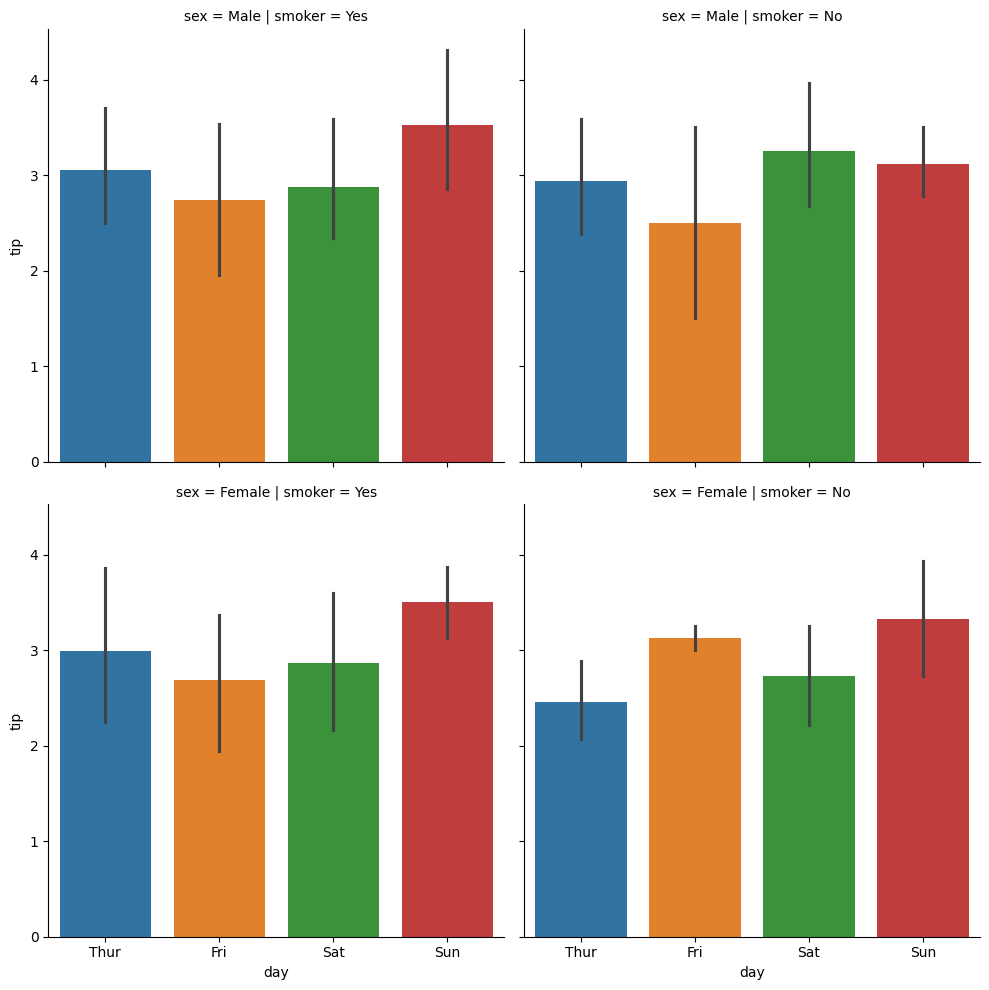

In [140]:
# 요일(x축)별 팁의 평균(y축) 막대 그래프
# 성별로 Axes를 나누고(서브플롯의 행), 흡연여부별로 Axes를 나눠서(서브플롯의 열) 시각화.
sns.catplot(data=tips, x='day', y='tip', hue='day', row='sex', col='smoker', kind='bar')
# 파라미터 row : Axes의 행을 나누는 기준(카테고리)이 되는 변수
# 파라미터 col : Axes의 열을 나누는 기준(카테고리)이 되는 변수
# 파라미터 kind : 각각의 Axes의 시각화할 그래프 종류(기본값: strip). bar, box, ...
plt.show()

In [141]:
tips.groupby(by=['sex', 'smoker', 'day'], observed=False).tip.mean()

sex     smoker  day 
Male    Yes     Thur    3.058000
                Fri     2.741250
                Sat     2.879259
                Sun     3.521333
        No      Thur    2.941500
                Fri     2.500000
                Sat     3.256563
                Sun     3.115349
Female  Yes     Thur    2.990000
                Fri     2.682857
                Sat     2.868667
                Sun     3.500000
        No      Thur    2.459600
                Fri     3.125000
                Sat     2.724615
                Sun     3.329286
Name: tip, dtype: float64

## Ex 1.

*   요일별 팁의 평균 막대 그래프. 흡연여부(subplot의 행), 시간(subplot의 열)으로 Axes를 나눠서 그래프 작성.
*   groupby 메서드와 통계 함수를 이용해 값 계산.

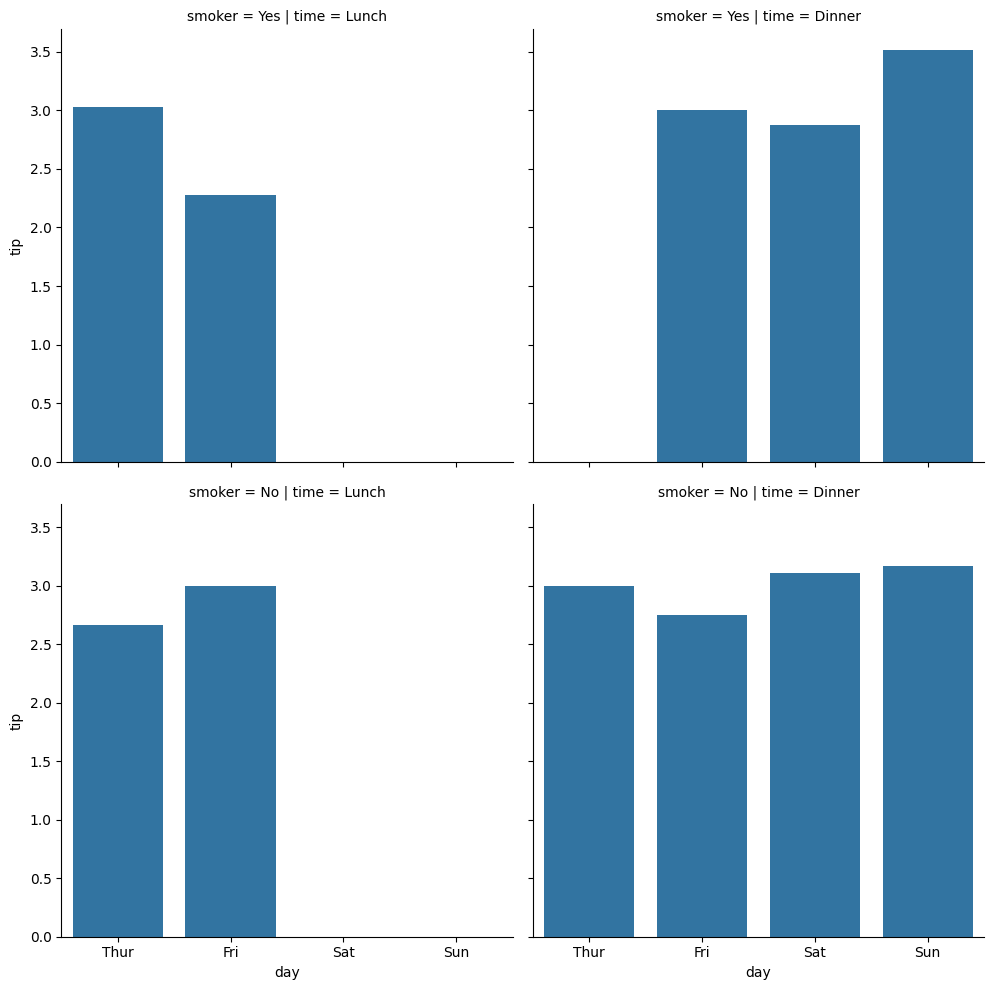

In [163]:
sns.catplot(data=tips, x='day', y='tip', row='smoker', col='time', kind='bar', errorbar=None)

plt.show()

In [168]:
tips.groupby(by=['smoker', 'time', 'day'], observed=False).tip.mean()

smoker  time    day 
Yes     Lunch   Thur    3.030000
                Fri     2.280000
                Sat          NaN
                Sun          NaN
        Dinner  Thur         NaN
                Fri     3.003333
                Sat     2.875476
                Sun     3.516842
No      Lunch   Thur    2.666364
                Fri     3.000000
                Sat          NaN
                Sun          NaN
        Dinner  Thur    3.000000
                Fri     2.750000
                Sat     3.102889
                Sun     3.167895
Name: tip, dtype: float64

In [170]:
tips.groupby(by=['smoker', 'time', 'day'], observed=True).tip.mean()

smoker  time    day 
Yes     Lunch   Thur    3.030000
                Fri     2.280000
        Dinner  Fri     3.003333
                Sat     2.875476
                Sun     3.516842
No      Lunch   Thur    2.666364
                Fri     3.000000
        Dinner  Thur    3.000000
                Fri     2.750000
                Sat     3.102889
                Sun     3.167895
Name: tip, dtype: float64

## Ex 2.

*   요일별(x축), 성별(색깔) 팁의 평균 막대 그래프. 흡연여부(subplot의 행), 시간(subplot의 열)으로 Axes를 나눠서 그래프 작성.
*   groupby 메서드와 통계 함수를 이용해 값들 계산.

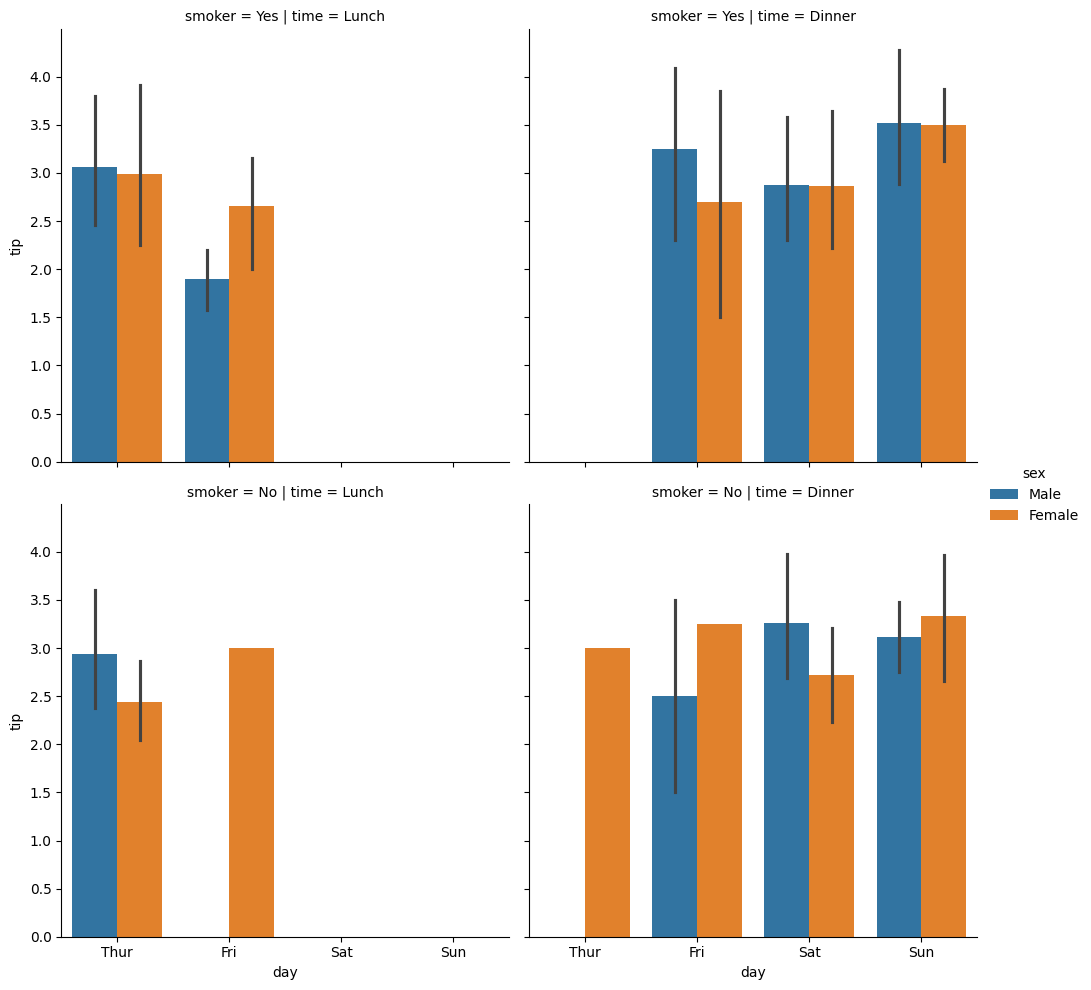

In [151]:
sns.catplot(data=tips, x='day', y='tip', hue='sex', row='smoker', col='time', kind='bar')

plt.show()

In [172]:
tips.groupby(by=['smoker', 'time', 'sex', 'day'], observed=True).tip.mean()

smoker  time    sex     day 
Yes     Lunch   Male    Thur    3.058000
                        Fri     1.900000
                Female  Thur    2.990000
                        Fri     2.660000
        Dinner  Male    Fri     3.246000
                        Sat     2.879259
                        Sun     3.521333
                Female  Fri     2.700000
                        Sat     2.868667
                        Sun     3.500000
No      Lunch   Male    Thur    2.941500
                Female  Thur    2.437083
                        Fri     3.000000
        Dinner  Male    Fri     2.500000
                        Sat     3.256563
                        Sun     3.115349
                Female  Thur    3.000000
                        Fri     3.250000
                        Sat     2.724615
                        Sun     3.329286
Name: tip, dtype: float64

## Ex 3.

*   요일별 팁의 box plot. 흡연여부(subplot의 행), 시간(subplot의 열)으로 Axes를 나눠서 그래프 작성.
*   groupby 메서드와 describe 메서드를 사용해서 기술 통계량들을 계산.

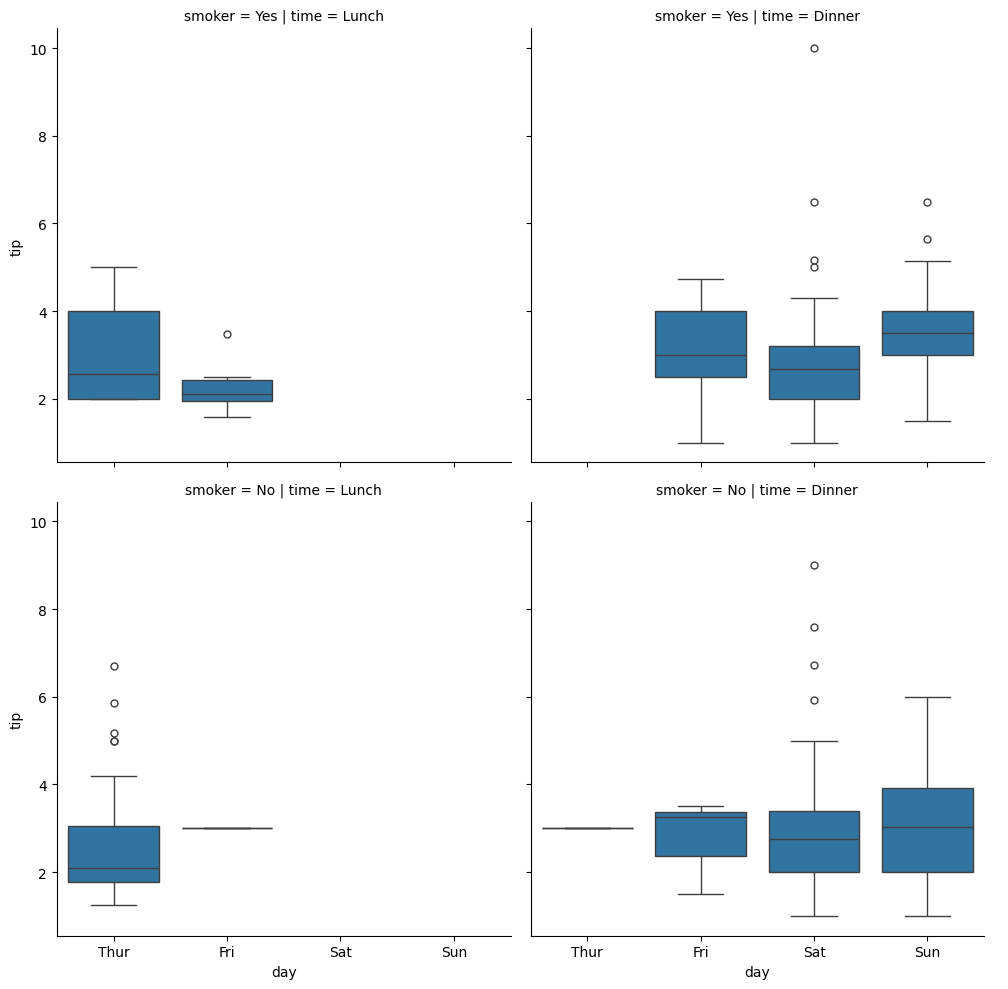

In [159]:
sns.catplot(data=tips, x='day', y='tip', row='smoker', col='time', kind='box')

In [173]:
tips.groupby(by=['smoker', 'time', 'day'], observed=True).tip.describe()

count      mean       std   min     25%    50%     75%  \
smoker time   day                                                            
Yes    Lunch  Thur   17.0  3.030000  1.113491  2.00  2.0000  2.560  4.0000   
              Fri     6.0  2.280000  0.662239  1.58  1.9400  2.100  2.4250   
       Dinner Fri     9.0  3.003333  1.234038  1.00  2.5000  3.000  4.0000   
              Sat    42.0  2.875476  1.630580  1.00  2.0000  2.690  3.1975   
              Sun    19.0  3.516842  1.261151  1.50  3.0000  3.500  4.0000   
No     Lunch  Thur   44.0  2.666364  1.296821  1.25  1.7825  2.105  3.0625   
              Fri     1.0  3.000000       NaN  3.00  3.0000  3.000  3.0000   
       Dinner Thur    1.0  3.000000       NaN  3.00  3.0000  3.000  3.0000   
              Fri     3.0  2.750000  1.089725  1.50  2.3750  3.250  3.3750   
              Sat    45.0  3.102889  1.642088  1.00  2.0100  2.750  3.3900   
              Sun    57.0  3.167895  1.224785  1.01  2.0000  3.020  3.9200   

                      max  
smoker time   day          
Yes    Lunch  Thur   5.00  
              Fri    3.48  
       Dinner Fri    4.73  
              Sat   10.00  
              Sun    6.50  
No     Lunch  Thur   6.70  
              Fri    3.00  
       Dinner Thur   3.00  
              Fri    3.50  
              Sat    9.00  
              Sun    6.00

# plotly 모듈

interactive graph

## box plot

In [175]:
# 성별 tip의 box plot
figure = px.box(data_frame=tips, x='sex', y='tip', color='sex')
figure.show()

In [179]:
# 요일별 성별 tip의 box plot
figure = px.box(data_frame=tips, x='day', y='tip', color='sex')
figure.show()

## scatter plot

In [181]:
# tip ~ total_bill
figure = px.scatter(data_frame=tips, x='total_bill', y='tip')
figure.show()

In [185]:
# tip ~ total_bill 산점도. 성별로 색깔 다르게, 요일별로 마커 모양 다르게, 인원수별로 마커 크기를 다르게 시각화.
figure = px.scatter(data_frame=tips, x='total_bill', y='tip', color='sex', symbol='day', size='size')
figure.show()

In [192]:
figure = px.histogram(data_frame=tips, x='total_bill', nbins=20, template='simple_white')
figure.show()

## facetting

1개의 Figure 객체에 행과 열을 구분해서 Axes들을 생성하는 것.

In [195]:
figure = px.scatter(data_frame=tips, x='total_bill', y='tip',
                    color = 'sex',
                    facet_row='smoker',
                    facet_col='time')

figure.show()

In [197]:
figure = px.box(data_frame = tips, x='day', y='tip',
                facet_row='time',
                facet_col='smoker')
figure.show()

In [198]:
# pie plot 연습하기

In [ ]:
pass